# Detecting fake news: binary classification of fake vs. true news based on textual characteristics of news articles
By Sarah Gauthier, Jessie Liang and Vinay Valson 2025-11-19

In [1]:
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import(
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline, make_pipeline
import altair as alt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from scipy.stats import expon, lognorm, loguniform, randint, uniform, norm, randint
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

## Summary

## Introduction

## Methods & Results

In [2]:
true_url = "../data/True.csv" 
fake_url = "../data/Fake.csv"
true_df = pd.read_csv(true_url)
fake_df = pd.read_csv(fake_url)

In [3]:
true_df['target'] = 'True'
true_df['subject'] = true_df['subject'].replace('politicsNews', 'political')
true_df['subject'] = true_df['subject'].replace('worldnews', 'non-political')
true_df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,political,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,political,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,political,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,political,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,political,"December 29, 2017",True


In [4]:
fake_df['target'] = 'Fake'
fake_df['subject'] = fake_df['subject'].replace('politics', 'political')
fake_df['subject'] = fake_df['subject'].replace('left-news', 'political')
fake_df['subject'] = fake_df['subject'].replace('Government News', 'political')
fake_df['subject'] = fake_df['subject'].replace('News', 'non-political')
fake_df['subject'] = fake_df['subject'].replace('US_News', 'non-political')
fake_df['subject'] = fake_df['subject'].replace('Middle-east', 'non-political')
fake_df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,non-political,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,non-political,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",non-political,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",non-political,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,non-political,"December 25, 2017",Fake


In [24]:
complete_df = pd.concat([true_df, fake_df])

# Split into train/test data sets
train_df, test_df = train_test_split(
    complete_df, train_size=0.80, random_state=123
)

X_train, y_train = train_df.drop(columns=["target"]), train_df["target"]
X_test, y_test = test_df.drop(columns=["target"]), test_df["target"]

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35918 entries, 4453 to 15725
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    35918 non-null  object
 1   text     35918 non-null  object
 2   subject  35918 non-null  object
 3   date     35918 non-null  object
 4   target   35918 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


#### Count of Fake vs. Real News Articles

In [7]:
alt.data_transformers.enable('vegafusion')

count_chart = alt.Chart(train_df).mark_bar().encode(
    x=alt.X('count():Q', title='Count'),
    y=alt.Y('target:N', title='Label'),
    color='target:N'
)

count_chart

alt.Chart(...)

In [8]:
fake_text = train_df[train_df['target'] == 'Fake']['text']
true_text = train_df[train_df['target'] == 'True']['text']
fake_text = fake_text.str.replace(r'[^\w\s]', '', regex=True) # remove punctuation
true_text = true_text.str.replace(r'[^\w\s]', '', regex=True) # remove punctuation
fake_words = fake_text.str.cat(sep=" ")
true_words = true_text.str.cat(sep=" ")

fake_titles = train_df[train_df['target'] == 'Fake']['title']
true_titles = train_df[train_df['target'] == 'True']['title']
fake_titles = fake_titles.str.replace(r'[^\w\s]', '', regex=True) # remove punctuation
true_ttitles = true_titles.str.replace(r'[^\w\s]', '', regex=True) # remove punctuation
fake_title_words = fake_titles.str.cat(sep=" ")
true_title_words = true_titles.str.cat(sep=" ")

#### Word Clouds for Titles Column

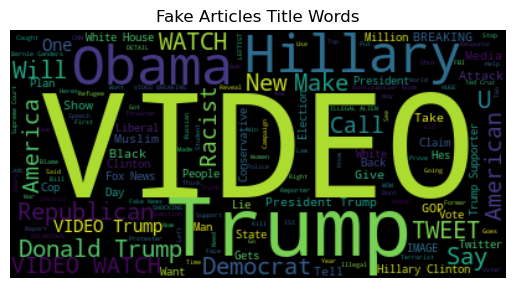

In [9]:
wordcloud_title_fake = WordCloud().generate(fake_title_words)
plt.figure()
plt.imshow(wordcloud_title_fake, interpolation="bilinear")
plt.title("Fake Articles Title Words")
plt.axis("off")
plt.show()

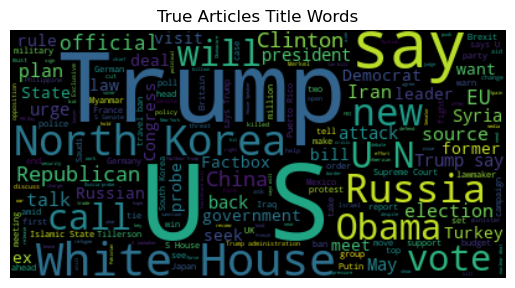

In [10]:
wordcloud_title_true = WordCloud().generate(true_title_words)
plt.figure()
plt.imshow(wordcloud_title_true, interpolation="bilinear")
plt.title("True Articles Title Words")
plt.axis("off")
plt.show()

#### Word Clouds for Text Column

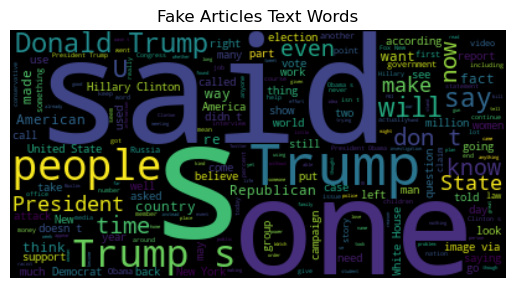

In [11]:
wordcloud_fake = WordCloud().generate(fake_words)
plt.figure()
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.title("Fake Articles Text Words")
plt.axis("off")
plt.show()

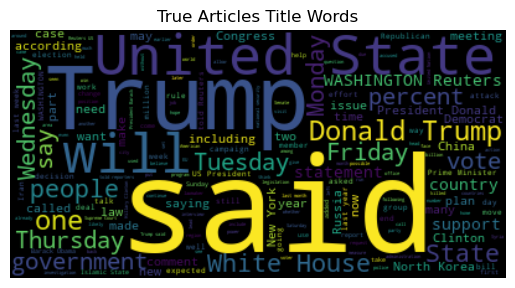

In [12]:
wordcloud_true = WordCloud().generate(true_words)
plt.figure()
plt.imshow(wordcloud_true, interpolation="bilinear")
plt.title("True Articles Title Words")
plt.axis("off")
plt.show()

#### Comparing title and text length between fake and real news articles

In [13]:
train_df["title_length"] = train_df["title"].str.len()
train_df["text_length"] = train_df["text"].str.len()

In [14]:
title_length_hist = alt.Chart(train_df).mark_bar(opacity=0.75).encode(
    x=alt.X('title_length',
            bin=alt.Bin(maxbins=30),
            title='Title Length (Number of Words)'),
    y=alt.Y('count()', title='Number of Articles'),
    color=alt.Color('target', title='News Type')
).properties(
    title='Distribution of Article Title Lengths by News Type',
    height=300,
    width=500
)

title_length_hist

alt.Chart(...)

In [15]:
filtered_df = train_df[train_df['text_length'] < 12000]

text_length_hist = alt.Chart(filtered_df).mark_bar(opacity=0.75).encode(
    x=alt.X('text_length',
            bin=alt.Bin(maxbins=30),
            title='Text Length (Number of Words)'),
    y=alt.Y('count()', title='Number of Articles'),
    color=alt.Color('target', title='News Type')
).properties(
    title='Distribution of Article Text Lengths by News Type',
    height=300,
    width=500
)

text_length_hist

alt.Chart(...)

In [16]:
number_of_fake = train_df[train_df['target'] == 'Fake'].shape[0]
number_of_true = train_df[train_df['target'] == 'True'].shape[0]
plot_df = train_df.groupby(['target', 'subject']).size().reset_index()
plot_df.columns = ['target', 'subject', 'count']
plot_df.loc[plot_df['target'] == 'Fake', 'total'] = number_of_fake
plot_df.loc[plot_df['target'] == 'True', 'total'] = number_of_true
plot_df['percentage'] = plot_df['count'] / plot_df['total']

alt.Chart(plot_df).mark_bar().encode(
    alt.X('percentage').title('Percentage of count'),
    alt.Y('subject').title('Subject type'),
    alt.Color('subject').title('Subject type')
).facet(
    'target',
    columns=1
).properties(
    title='Percentage of counts of (non-)political news in fake and true news'
)

alt.FacetChart(...)

**Comment**: From the faceted bar plot above, political news accounts for a larger portion of the fake news, while there are a smaller percentage of political news in the true news. The difference of percentages exists but is not conspicuous, suggesting this engineered feature `subject` may still be useful in predicting whether news is true. Therefore, the feature `subject` (political vs non-political) is included in the classification model below.

## Classification Models

### 1. Dummy Classifier

Dummy classifier acts as the baseline before building advanced models. The strategy used is `"most_frequent"` so that the dummy classifier always predicts the majority class. Using this strategy, the test score is low (only 0.54) due to a relatively balanced dataset. The goal later on is to build a classification model that does well compared to this dummy.

In [33]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.5395322939866369

### 2. Naive Bayes

`MultinomialNB` is used as the estimator to deal with integer counts data, after proper preprocessing of the features. Two textual features (`title` and `text`) and a categorical feature `subject` with only two levels (political and non-political) are included in modelling. The `date` feature is dropped due to its irrelevance to the target. Genereally speaking, when the news is published is random information and has little to do with whether the news is fake or true.

As a first step, the features should be preprocessed. One-Hot encoding is applied to the categorical feature `subject` with `drop="if_binary"` to include only one column for this binary feature. For the two textual features, `title` and `text`, they are first transformed by `lambda x: np.ravel(x)` to be one-dimensional arrays. After being flattened, they are then passed to `CountVectorizer` to extract the words and number of occurrences from these two features. Note that `CountVectorizer` needs to be created twice, one for each textual feature.

Next, a machine learning pipeline `pipe` is created, with preprocessing and the naive bayes estimator.

In [26]:
title_feature = 'title'
text_feature = 'text'
categorical_feature = ['subject']
drop_feature = ['date']

title_pipe = make_pipeline(
    FunctionTransformer(lambda x: np.ravel(x)), 
    CountVectorizer()
)
text_pipe = make_pipeline(
    FunctionTransformer(lambda x: np.ravel(x)), 
    CountVectorizer()
)

preprocessor = ColumnTransformer(
    [
        ("one_hot", OneHotEncoder(drop="if_binary"), categorical_feature),
        ("title_vectorizer", title_pipe, "title"),
        ("text_vectorizer", text_pipe, "text"),
        ("drop", "drop", drop_feature)
    ]
)

pipe = make_pipeline(preprocessor, MultinomialNB())

Before fitting the model to the training set, hyperparameter tuning is carried out to boost classification performance. There are 3 hyperparameters being considered: `max_feautres` of the two `CountVectorizer`s, and `alpha` of `MultinomialNB`. The distributions of these hyperparameters to search from are specified below, followed by `RandomizedSearchCV` to do random search and cross validation. 

Note that `RandomizedSearchCV` runs very slowly in this case. To reduce computation time, `n_iter` is set to only 10. Albeit doing only 10 searches, the best model found already performs excellent, as we can see the CV score and test score later on.

In [27]:
param_dist = {
    "columntransformer__title_vectorizer__countvectorizer__max_features": randint(1, 200),
    "columntransformer__text_vectorizer__countvectorizer__max_features": randint(1, 5000),
    "multinomialnb__alpha": 10.0 ** np.arange(-7, 1)
}

random_search = RandomizedSearchCV(pipe, 
                                   param_distributions=param_dist, 
                                   n_iter=10, n_jobs=-1,
                                   return_train_score=True,
                                   random_state=123) 

After fitting the model to the training set, best hyperparameters and CV score can be extracted from the model. The best values of all 3 hyperparameters are in the middle of the search ranges instead of being on the edge, so the search ranges are specified appropriately. 

Under this model, the training score is 0.956. The best CV score is 0.955, and the test score is 0.951. Since the train, CV and test score are close to one another and are both high, underfitting or overfitting is not a concern here.

Compared to dummy classifier, this ML model does a lot better in terms of prediction accuracy, increasing the test score from 0.54 to 0.95.

In [28]:
random_search.fit(X_train, y_train)
random_search.best_params_

{'columntransformer__text_vectorizer__countvectorizer__max_features': 1160,
 'columntransformer__title_vectorizer__countvectorizer__max_features': 106,
 'multinomialnb__alpha': np.float64(0.0001)}

In [34]:
random_search.score(X_train, y_train)

0.9556768194220168

In [30]:
random_search.best_score_

np.float64(0.95523124461462)

In [31]:
random_search.score(X_test, y_test)

0.950890868596882

Below are the visualizations of the classification results on the test set, as a model performance assessment.

- confusion matrix

- precision-recall curve

- ROC curve

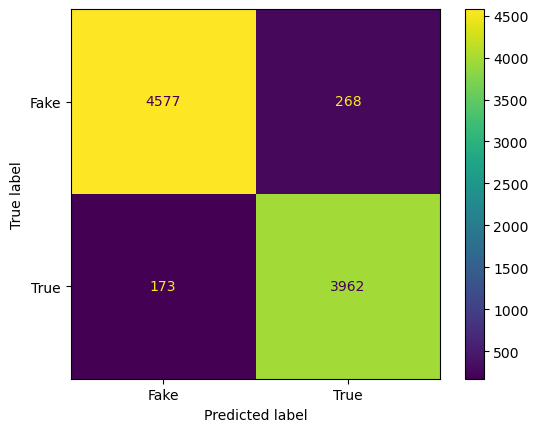

In [35]:
ConfusionMatrixDisplay.from_estimator(
    random_search,
    X_test,
    y_test,
    values_format="d"
)

**Comment**: The model classifies both true and fake news correctly the most of the time, due to a high true postive and true negative rate. Both false positve and false negative rates are low, since there are just a few misclassifications. So, not only the model accuracy is high, but also the model is robust in detecting both true and fake news.

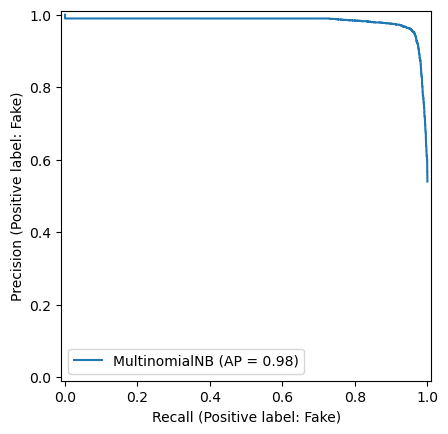

In [36]:
PrecisionRecallDisplay.from_estimator(
    random_search,
    X_test,
    y_test,
    pos_label='Fake',
    name='MultinomialNB'
);

**Comment**: The AP score, as a summary of the PR curve, is 0.98. That fact that the AP score is very close to 1 suggests that our Naive Bayes model's performance is excellent.

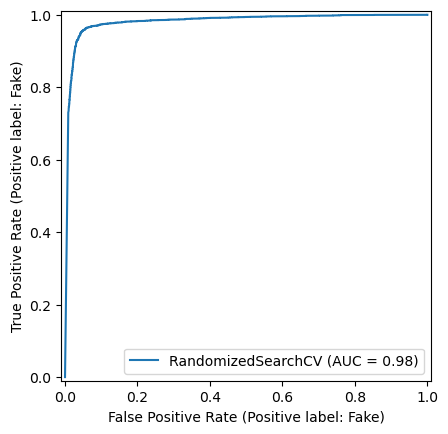

In [37]:
RocCurveDisplay.from_estimator(
    random_search,
    X_test,
    y_test,
    pos_label='Fake'
);

**Comment**: The AUC here is 0.98, much higher than the baseline 0.5, which also indicates the satisfactory model performance.

## Discussion

### 1. Result summary



## References